# Завдання





Компанія виконує три види послуг, дохід від яких не однаковий, і через відсутність концентрації на найприбутковішому продукті недоотримує прибуток. Твоїм завданням є формулювання задачі оптимізації процесу розробки в компанії за нижченаведених умов.

У процесі задіяні дизайнери, розробники та тестувальники. Дизайнерів у компанії двоє, фонд праці кожного — 160 годин роботи на місяць. Програмістів також двоє, проте їх загальний фонд праці — лише 192 години. Тестувальник один, але працює понаднормово — 180 годин.

Компанія може створювати сайти, інтернет-магазини та інтеграції із ERP.
Вартість послуги розробки та час роботи спеціалістів за кожним видом робіт наступні:

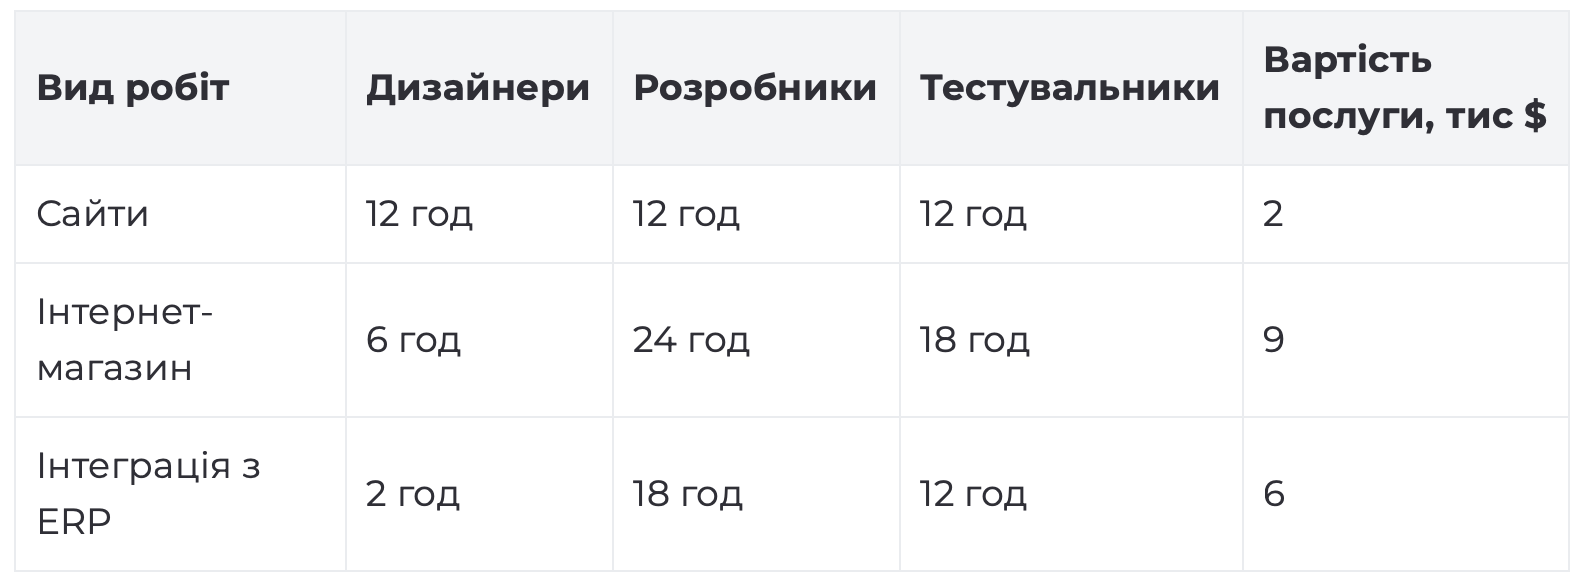

# Рішення

Нехай:

**x** - к-ть веб-сайтів

**y** - к-ть інтернет магазинів

**z** - к-ть інтеграцій з ERP

Тоді

**загальний дохід = 2x + 9y + 6z**,

 де 2, 9 та 6 доходи в тисячах доларів для веб-сайтів(x), інтернет-магазинів(y) та інтеграції ERP(z) відповідно.

Нам потрібно переконатися, що загальна кількість годин, витрачених кожним типом працівників, не перевищує їх доступних годин.

**Для цього встановлюємо обмеження:**

**Дизайнери:**
12x + 6y + 2z ≤ 320 *(Так як дизайнерів два і кожен доступний по 160 годин)*                                                         

**Розробники:**
12x + 24y + 18z ≤ 192 *(Доступні години для двох розробників
разом)*                                                      

**Тестувальники:**
12x + 18y + 12z ≤ 180
*(Години, доступні для одного тестувальника)*

Крім того, кількість кожного виду послуг має бути невід’ємною:

x ≥ 0, y ≥ 0, z ≥ 0



In [1]:
from scipy.optimize import linprog

# Coefficients of the objective function (negated for maximization)
c = [-2, -9, -6]  # We want to maximize, linprog does minimization by default, hence we use -ve values

# Coefficients for the inequality constraints (Ax <= b)
A = [
    [12, 6, 2],   # Designer hours
    [12, 24, 18], # Developer hours
    [12, 18, 12]  # Tester hours
]
b = [320, 192, 180]  # Total available hours for designers, developers, and testers

# Bounds for each variable, ensuring non-negative solutions
x_bounds = (0, None)  # No upper limit on x
y_bounds = (0, None)  # No upper limit on y
z_bounds = (0, None)  # No upper limit on z

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='highs')

# Output result
result.x, -result.fun  # Solution for x, y, z and the maximum revenue (negate the function value to get max)

(array([0., 8., 0.]), 72.0)

# Висновки




Оптимальним розподілом послуг для максимізації прибутку є:

*   Веб-сайти (x): 0 (жоден не повинен бути розроблений)
*   Магазини електронної комерції (y): 8 (зосереджено на розвитку восьми магазинів електронної комерції)
*   Інтеграції ERP (z): 0 (не слід розробляти)

Максимальний місячний дохід, який можна отримати за цих умов, становить 72 000 доларів США.